In [22]:
import pandas as pd 

df = pd.read_csv('../data/user_personalized_features.csv')
df.head(10)

,Unnamed: 0,User_ID,Age,Gender,Location,Income,Interests,Last_Login_Days_Ago,Purchase_Frequency,Average_Order_Value,Total_Spending,Product_Category_Preference,Time_Spent_on_Site_Minutes,Pages_Viewed,Newsletter_Subscription
0,0,#1,56,Male,Suburban,38037,Sports,5,7,18,2546,Books,584,38,True
1,1,#2,46,Female,Rural,103986,Technology,15,7,118,320,Electronics,432,40,False
2,2,#3,32,Female,Suburban,101942,Sports,28,1,146,3766,Apparel,306,1,True
3,3,#4,60,Female,Suburban,71612,Fashion,18,3,163,4377,Apparel,527,29,False
4,4,#5,25,Male,Suburban,49725,Travel,2,5,141,4502,Health & Beauty,53,10,True
5,5,#6,38,Male,Suburban,25926,Travel,22,8,25,2669,Books,520,28,False
6,6,#7,56,Male,Urban,124555,Fashion,11,7,152,1113,Home & Kitchen,330,31,True
7,7,#8,36,Male,Urban,29496,Technology,26,7,108,2151,Apparel,558,19,True
8,8,#9,40,Male,Rural,76447,Travel,25,6,130,4085,Books,325,3,True
9,9,#10,28,Male,Urban,121604,Food,13,8,61,4999,Electronics,114,36,False


In [23]:
df = df.drop(columns=['Unnamed: 0', 'User_ID'])
df.columns 

Index(['Age', 'Gender', 'Location', 'Income', 'Interests',
       'Last_Login_Days_Ago', 'Purchase_Frequency', 'Average_Order_Value',
       'Total_Spending', 'Product_Category_Preference',
       'Time_Spent_on_Site_Minutes', 'Pages_Viewed',
       'Newsletter_Subscription'],
      dtype='object')

In [24]:
print(df.isna().sum())
print(df.isnull().sum())
print(df.duplicated().sum())

Age                            0
Gender                         0
Location                       0
Income                         0
Interests                      0
Last_Login_Days_Ago            0
Purchase_Frequency             0
Average_Order_Value            0
Total_Spending                 0
Product_Category_Preference    0
Time_Spent_on_Site_Minutes     0
Pages_Viewed                   0
Newsletter_Subscription        0
dtype: int64
Age                            0
Gender                         0
Location                       0
Income                         0
Interests                      0
Last_Login_Days_Ago            0
Purchase_Frequency             0
Average_Order_Value            0
Total_Spending                 0
Product_Category_Preference    0
Time_Spent_on_Site_Minutes     0
Pages_Viewed                   0
Newsletter_Subscription        0
dtype: int64
0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Age                          1000 non-null   int64 
 1   Gender                       1000 non-null   object
 2   Location                     1000 non-null   object
 3   Income                       1000 non-null   int64 
 4   Interests                    1000 non-null   object
 5   Last_Login_Days_Ago          1000 non-null   int64 
 6   Purchase_Frequency           1000 non-null   int64 
 7   Average_Order_Value          1000 non-null   int64 
 8   Total_Spending               1000 non-null   int64 
 9   Product_Category_Preference  1000 non-null   object
 10  Time_Spent_on_Site_Minutes   1000 non-null   int64 
 11  Pages_Viewed                 1000 non-null   int64 
 12  Newsletter_Subscription      1000 non-null   bool  
dtypes: bool(1), int64(8), object(4)
me

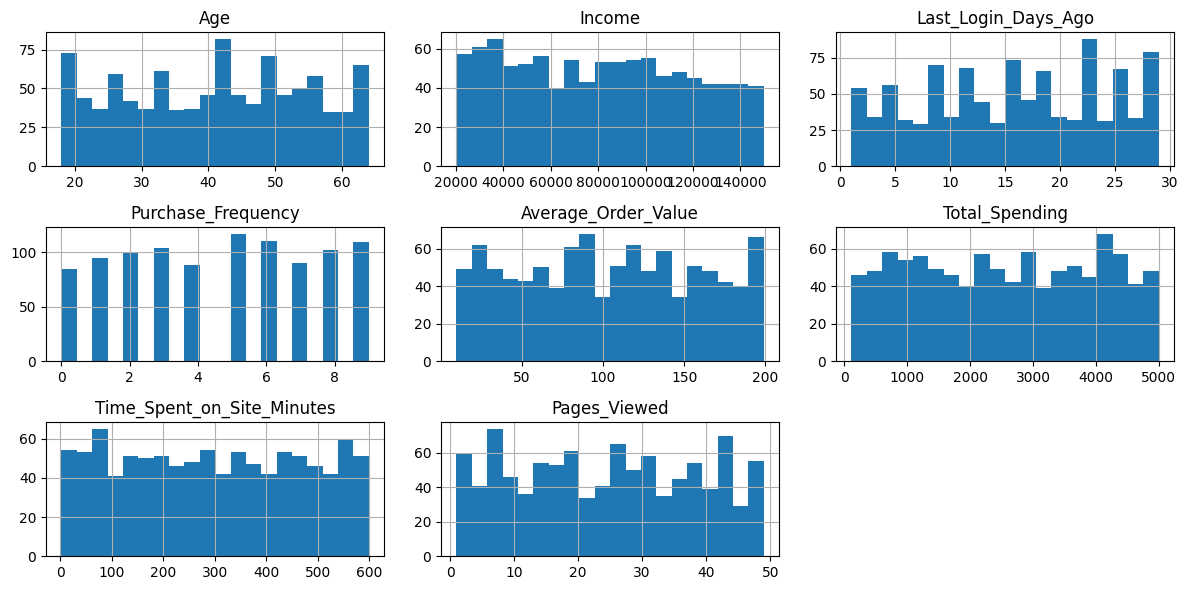

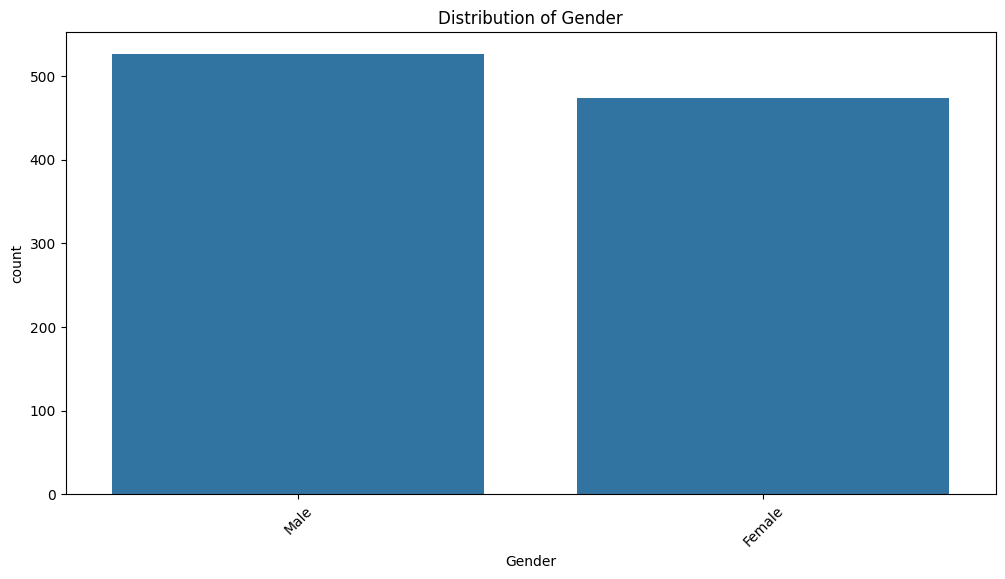

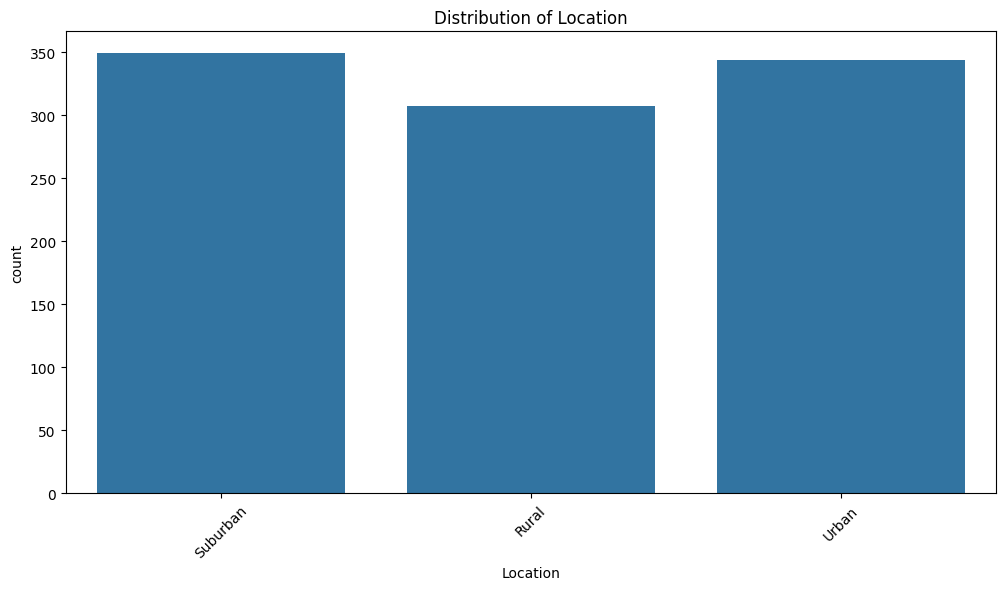

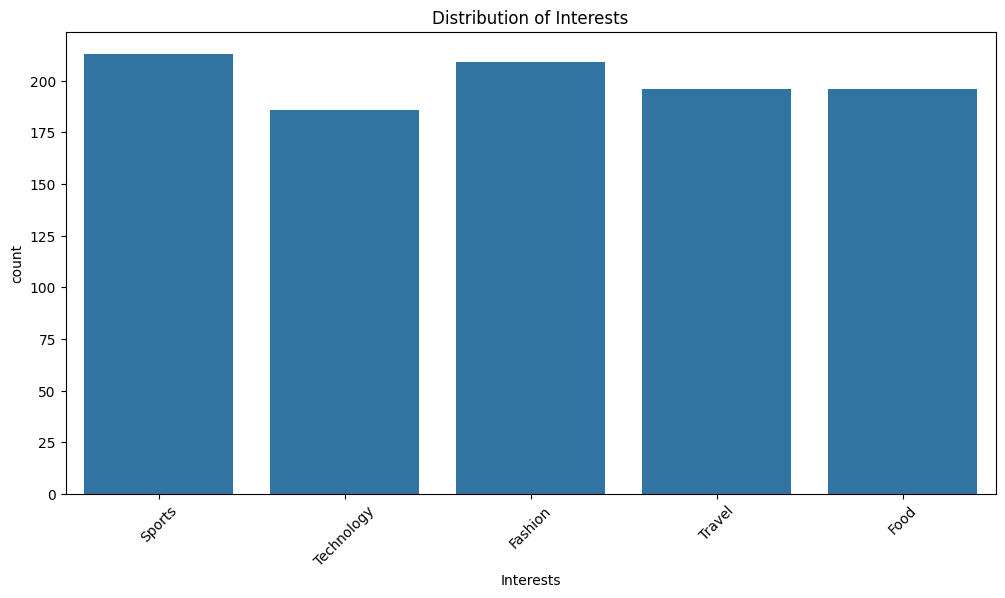

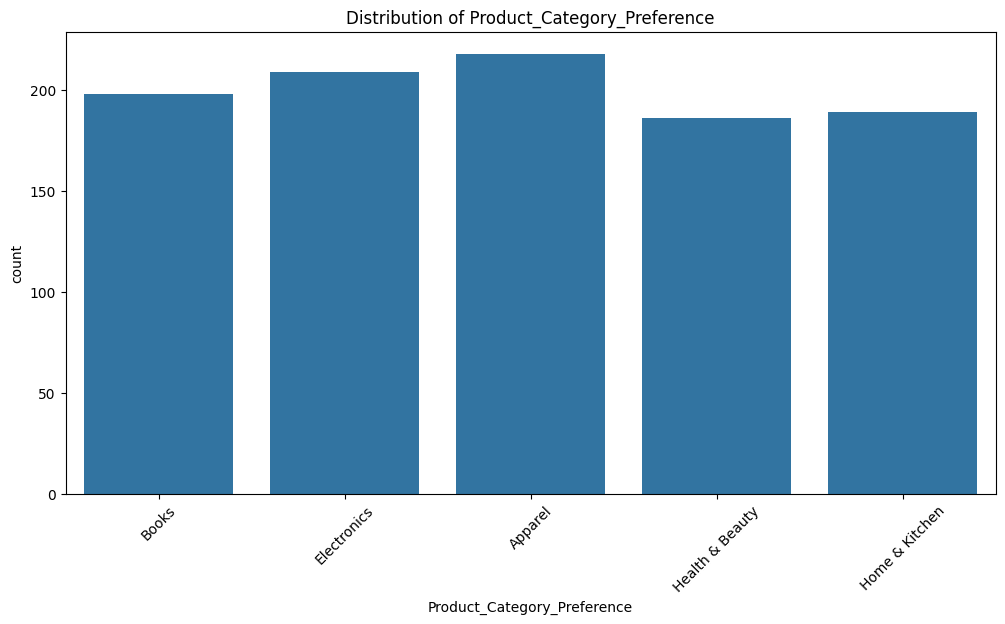

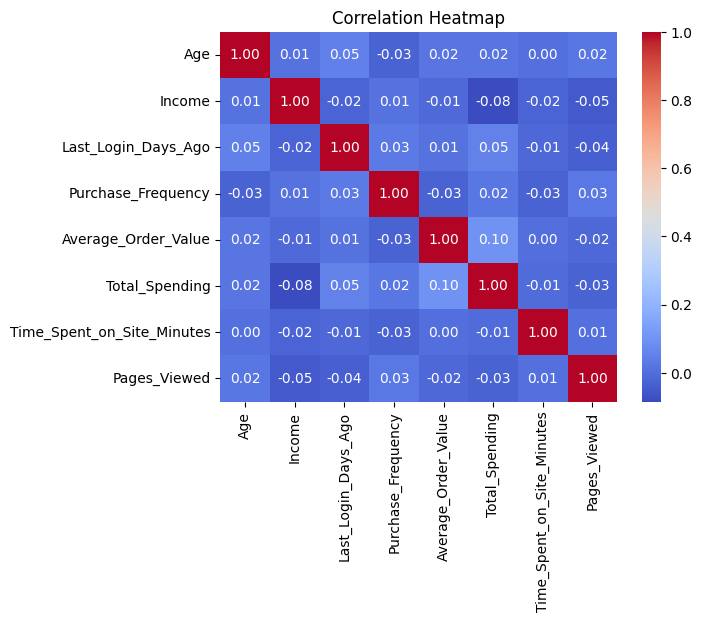

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df.hist(bins=20, figsize=(12, 6))
plt.tight_layout()
plt.show()

cat_cols = df.select_dtypes(include=['object']).columns.to_list()
num_cols = df.select_dtypes(include=['number']).columns.to_list()

for col in cat_cols:
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

sns.heatmap(df[num_cols].corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()



<h1> Segmenting Customers Using KMeans </h1>
<h2> Used for new users with no historical data </h2>

Text(0, 0.5, 'WCSS')

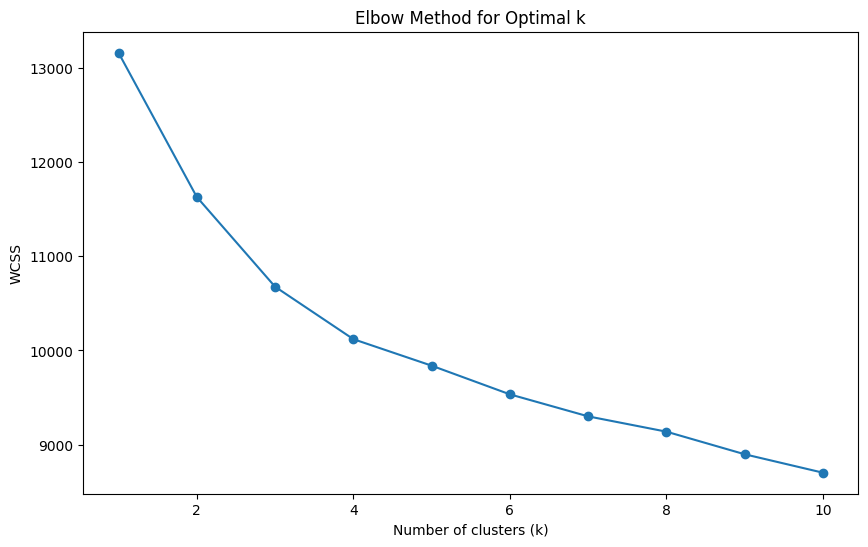

In [27]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

label_encoder = {}

for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoder[col] = le

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

pca = PCA(n_components=2)
pca_components = pca.fit_transform(df)

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')


In [29]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report

# Encode all categorical columns except the target
cat_cols = [col for col in df.select_dtypes(include='object').columns if col != 'Product_Category_Preference']
label_encoder = {}

for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoder[col] = le

# Optionally encode the target for classification_report
le_target = LabelEncoder()
df['Product_Category_Preference_encoded'] = le_target.fit_transform(df['Product_Category_Preference'])

# Scale numeric columns
num_cols = [col for col in df.select_dtypes(include='number').columns if col not in ['Cluster']]

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# KMeans clustering (Cluster will be int)
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[num_cols])

# Ensure both columns are integer type
y_true = df['Product_Category_Preference_encoded'].astype(int)
y_pred = df['Cluster'].astype(int)



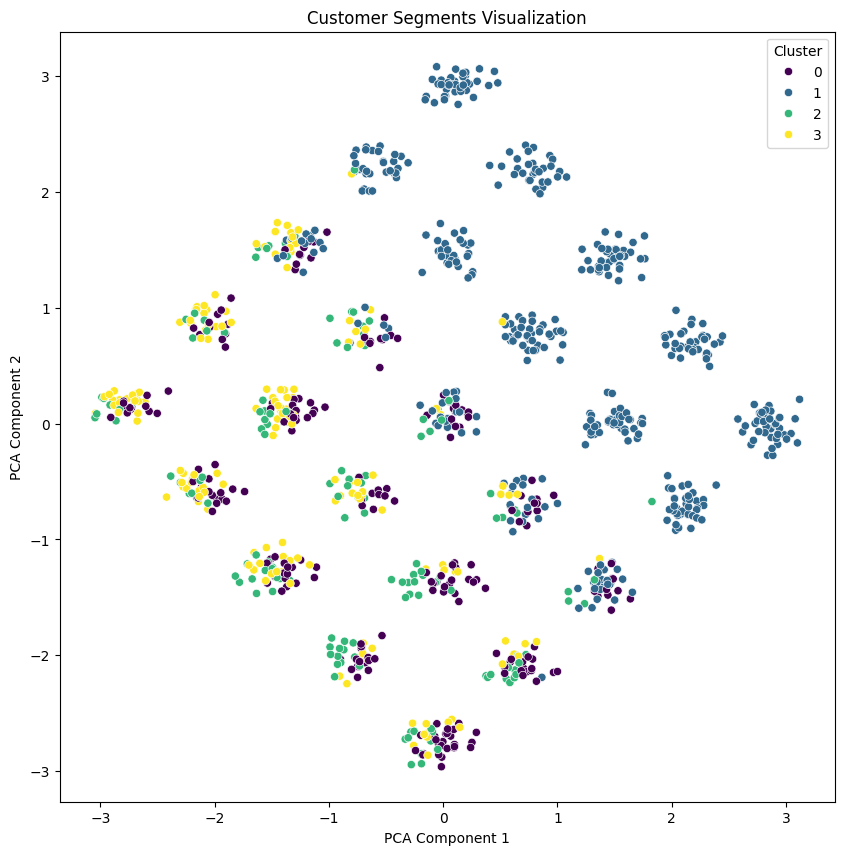

In [30]:
from sklearn.metrics import classification_report

optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(df)



plt.figure(figsize=(10, 10))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=df['Cluster'], palette='viridis')
plt.title('Customer Segments Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()
top_products_per_cluster = {}




In [34]:
optimal_clusters = 4  # or whatever number you used for KMeans

top_products_per_cluster = {}
for cluster_id in range(optimal_clusters):
    cluster_data = df[df['Cluster'] == cluster_id]
    top_products = cluster_data['Product_Category_Preference'].value_counts().head(3).index.tolist()
    top_products_per_cluster[cluster_id] = top_products

# Now convert encoded values to category names (safe conversion)
valid_labels = set(range(len(le.classes_)))
for cluster_id in top_products_per_cluster:
    encoded_products = top_products_per_cluster[cluster_id]
    encoded_products = [int(round(x)) for x in encoded_products if int(round(x)) in valid_labels]
    category_names = le.inverse_transform(encoded_products)
    top_products_per_cluster[cluster_id] = category_names.tolist()

print(top_products_per_cluster)

{0: ['Apparel'], 1: ['Books', 'Books', 'Apparel'], 2: ['Apparel'], 3: ['Apparel']}


<h1> User based collaborative filtering </h1>
<h2> Used to recommend products based on users' behavior </h2>

In [ ]:
from surprise import Dataset, Reader, KNNBasic
from surprise.model_selection import train_test_split
from surprise import accuracy
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder

dataset = pd.read_csv('data/user_personalized_features.csv')
dataset1 = dataset.copy()

category = dataset.select_dtypes(include=['object']).columns.to_list()
numeric = dataset.select_dtypes(include=['number']).columns.to_list()

label = {}
for col in category:
    le = LabelEncoder()
    dataset[col] = le.fit_transform(dataset[col])
    label[col] = le

scaler = StandardScaler()
dataset[numeric] = scaler.fit_transform(dataset[numeric])

kmeans = KMeans(n_clusters=4, random_state=42)
dataset['Cluster'] = kmeans.fit_predict(dataset)

dataset1['Purchase_Frequency'].describe()




count    1000.000000
mean        4.631000
std         2.837762
min         0.000000
25%         2.000000
50%         5.000000
75%         7.000000
max         9.000000
Name: Purchase_Frequency, dtype: float64

<h1> Using Total_Spending as Proxy for Rating </h1>

In [ ]:
import numpy as np
from surprise.model_selection import train_test_split

dataset1['Log_Total_Spending'] = np.log1p(dataset1['Total_Spending'])
reader = Reader(rating_scale=(dataset1['Log_Total_Spending'].min(), dataset1['Log_Total_Spending'].max()))
data = Dataset.load_from_df(dataset1[['User_ID', 'Product_Category_Preference', 'Log_Total_Spending']], reader)

trainset, testset = train_test_split(data, test_size=0.3, random_state=42)

sim_options = {
    'name': 'cosine',
    'user_based': True
}
model = KNNBasic(sim_options=sim_options)
model.fit(trainset)
predictions = model.test(testset)
print(accuracy.rmse(predictions))
print(accuracy.mae(predictions))


Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.8324
0.8323917849641517
MAE:  0.6521
0.6520542031213629


<h1> Using Purchase Frequency as proxy for user rating </h1>

In [ ]:
dataset1['Purchase_Frequency'].describe()

count    1000.000000
mean        4.631000
std         2.837762
min         0.000000
25%         2.000000
50%         5.000000
75%         7.000000
max         9.000000
Name: Purchase_Frequency, dtype: float64

In [ ]:
from surprise import Dataset, Reader, KNNBasic
from surprise.model_selection import train_test_split
from surprise import accuracy

# Use Purchase_Frequency as the rating
filtered = dataset1[dataset1['Purchase_Frequency'] > 0]

reader = Reader(rating_scale=(filtered['Purchase_Frequency'].min(), filtered['Purchase_Frequency'].max()))
data = Dataset.load_from_df(filtered[['User_ID', 'Product_Category_Preference', 'Purchase_Frequency']], reader)

trainset, testset = train_test_split(data, test_size=0.3, random_state=42)

sim_options = {
    'name': 'cosine',
    'user_based': True
}
model = KNNBasic(sim_options=sim_options)
model.fit(trainset)
predictions = model.test(testset)
print(accuracy.rmse(predictions))
print(accuracy.mae(predictions))


Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 2.6385
2.638520636415909
MAE:  2.2609
2.2608806818181817


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Normalize features to [0, 1]
scaler = MinMaxScaler()
filtered['Norm_Spending'] = scaler.fit_transform(filtered[['Total_Spending']])
filtered['Norm_Frequency'] = scaler.fit_transform(filtered[['Purchase_Frequency']])

# Combine them (e.g., average)
filtered['Combined_Score'] = (filtered['Norm_Spending'] + filtered['Norm_Frequency']) / 2

reader = Reader(rating_scale=(filtered['Combined_Score'].min(), filtered['Combined_Score'].max()))
data = Dataset.load_from_df(filtered[['User_ID', 'Product_Category_Preference', 'Combined_Score']], reader)

trainset, testset = train_test_split(data, test_size=0.3, random_state=42)

sim_options = {
    'name': 'cosine',
    'user_based': True
}
model = KNNBasic(sim_options=sim_options)
model.fit(trainset)
predictions = model.test(testset)
print(accuracy.rmse(predictions))
print(accuracy.mae(predictions))

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.2289
0.22893550018559014
MAE:  0.1897
0.18971088467257755


/var/folders/xp/yt82_4bn08z7yknl2pt809hw0000gn/T/ipykernel_7720/1596113018.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['Norm_Spending'] = scaler.fit_transform(filtered[['Total_Spending']])
/var/folders/xp/yt82_4bn08z7yknl2pt809hw0000gn/T/ipykernel_7720/1596113018.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['Norm_Frequency'] = scaler.fit_transform(filtered[['Purchase_Frequency']])
/var/folders/xp/yt82_4bn08z7yknl2pt809hw0000gn/T/ipykernel_7720/1596113018.py:9: SettingWithCop

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X = df[num_cols + cat_cols]
y = df['Product_Category_Preference']

if 'Product_Category_Preference' in X.columns:
    X = X.drop(columns=['Product_Category_Preference'])
if 'Product_Category_Preference' in cat_cols:
    cat_cols.remove('Product_Category_Preference')

for col in cat_cols:
    if X[col].dtype == 'object':
        X[col] = label_encoder[col].transform(X[col])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=45, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))

# To recommend for a new user:
# new_user = pd.DataFrame([user_features_dict])
# new_user[cat_cols] = new_user[cat_cols].apply(lambda col: label_encoder[col.name].transform(col))
# predicted_category = rf.predict(new_user)

                 precision    recall  f1-score   support

        Apparel       0.21      0.33      0.26        39
          Books       0.27      0.29      0.28        34
    Electronics       0.26      0.27      0.27        44
Health & Beauty       0.19      0.18      0.19        38
 Home & Kitchen       0.33      0.13      0.19        45

       accuracy                           0.24       200
      macro avg       0.25      0.24      0.24       200
   weighted avg       0.26      0.24      0.24       200



In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from surprise import Dataset, KNNBasic
from surprise.model_selection import train_test_split
from collections import defaultdict

# === (1) GỢI Ý CHO NGƯỜI DÙNG HIỆN TẠI BẰNG CF ===

def run_user_based_cf(user_id, trainset, cf_model):
    predictions = []
    all_items = trainset.all_items()
    item_inner_ids = [iid for iid in all_items if not trainset.knows_item(iid)]
    
    for iid in item_inner_ids:
        pred = cf_model.predict(user_id, trainset.to_raw_iid(iid))
        predictions.append((iid, pred.est))

    # Trả về top 5 sản phẩm dự đoán cao nhất
    top_n = sorted(predictions, key=lambda x: x[1], reverse=True)[:5]
    return [trainset.to_raw_iid(iid) for iid, _ in top_n]


# === (2) GỢI Ý CHO NGƯỜI DÙNG MỚI BẰNG KMEANS ===

def run_kmeans_suggestion(user_profile_vector, kmeans_model, cluster_top_products):
    cluster_id = kmeans_model.predict([user_profile_vector])[0]
    return cluster_top_products.get(cluster_id, [])


# === (3) CHỌN MÔ HÌNH PHÙ HỢP ===

def hybrid_recommend(user_id, user_profile_vector, trainset, cf_model, kmeans_model, cluster_top_products):
    if trainset.knows_user(user_id):
        return run_user_based_cf(user_id, trainset, cf_model)
    else:
        return run_kmeans_suggestion(user_profile_vector, kmeans_model, cluster_top_products)
